In [5]:
#import csv file containing number of long axis measurements in each bin
# startangle;endangle;length;number

import csv

startangs = []
endangs = []
no_sinkholes = [ ]

with open('salt_longax_orient_1701.csv') as csvfile:
    readcsv = csv.reader(csvfile, delimiter=';')
    next(readcsv, None) # skips header row
    
    for row in readcsv:
        no_sinkhole = row[3]
        startang = row[0]
        endang = row[1]

        startangs.append(startang)
        endangs.append(endang)
        no_sinkholes.append(no_sinkhole)
        
# read all data into a dataframe using pandas
import pandas as pd

dfi = pd.DataFrame({"st_ang":startangs, "end_ang":endangs, "no_SH":no_sinkholes})
#df # uncomment to see data in dataframe
    

In [20]:
# much better and quicker to use pandas to do it all

df = pd.read_csv('all_materials_longax_orient_1701.csv', delimiter=';', header=0)
df = df.drop(columns='Length') # remove length column

# create mirrored dataset for angles between 180 and 360
Sang2 = df.StartAngle+180
Eang2 = df.EndAngle+180
df2 = pd.DataFrame({'StartAngle':Sang2, 'EndAngle':Eang2, 'Number':df.Number})

# add dataframes together
df = df.append(df2, ignore_index=True)

#df # uncomment to see dataset

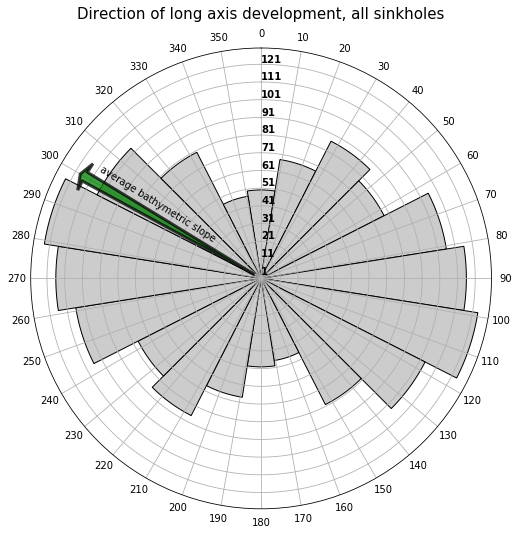

In [24]:
# plot the rose diagram
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
#np.deg2rad(np.arange(0, 360, 18))
ax.bar(np.deg2rad(df.StartAngle), df.Number, 
       width=np.deg2rad(360/20), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, df.Number.max() + 1, 10), angle=0, weight= 'black')
ax.set_title('Direction of long axis development, all sinkholes', y=1.05, fontsize=15)

# add arrow displaying average aspect of slope in salt areas
salt_azimuth = 278
mud_azimuth = 307
alluvium_azimuth = 315
all_mat_azimuth = 300

ax.arrow(np.deg2rad(all_mat_azimuth), 5, 0, 110, alpha = 0.75, width = 0.05, head_length=3,
                 edgecolor = 'black', facecolor = 'green', lw = 3, zorder = 5)

t = 'average bathymetric slope'
ax.text(np.deg2rad(all_mat_azimuth+3), 110, t, rotation=-32, fontsize=10)

plt.savefig('all_mat_sinkhole_longaxis_orient.png')